## Supervised Learning with scikit-learning - Part 3
## Part 3 - Fine-Tuning Your Model

In [1]:
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
churn_df = pd.read_csv('datasets/telecom_churn_clean.csv', index_col=0)
display(churn_df.head(5))
display(churn_df.info())

# Create X and y array
X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values
print(X.shape, y.shape)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   float

None

(3333, 18) (3333,)


## How good is your model?
Confusion matrix in scikit-learn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1126   12]
 [ 158   38]]


In [4]:
# Classification report in scikit-learn
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1138
           1       0.76      0.19      0.31       196

    accuracy                           0.87      1334
   macro avg       0.82      0.59      0.62      1334
weighted avg       0.86      0.87      0.84      1334



### Exercise - Assessing a diabetes prediction classifier
In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

In [5]:
df = pd.read_csv('./datasets/diabetes_clean.csv', index_col=None)
display(df.head())

diabetes_df = df.copy()

X = diabetes_df[["bmi", "age"]].values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

,Unnamed: 0,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


(537, 2) (537,)


In [6]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



The model produced 34 true positives and 35 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Logistic regression and  the ROC curve
Logistic regression is used for classification problems
<br>
Logistic regression outputs probabilities
- If the probability, p > 0.5
    - The data is labeled 1
- If the probability, p < 0.5
    -  The data is labeled 0

In [7]:
X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Predicting probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.2217155225925783


## ROC curve

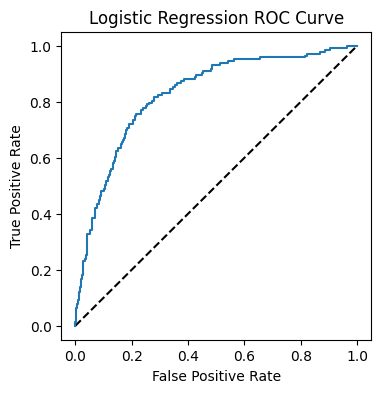

In [16]:
# Plotting the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [17]:
# ROC AUC in scikit-learn
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8272474316815042


The AOC is 82%

### Exercise - Building a logistic regression model
In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis

In [31]:
X = diabetes_df.drop(['diabetes'], axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

(537, 9) (537,)


In [32]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression( max_iter=10000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred = logreg.predict(X_test)

print(sorted(y_pred_probs[:10]))

[0.014718979722394167, 0.11501267718042482, 0.1315907811847775, 0.19476731233642144, 0.2462648588912284, 0.4705731004414505, 0.499182055705106, 0.5484508994545095, 0.5962498967675107, 0.8152589239582]


### Exercise - The ROC Curve
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

In [33]:
print(roc_auc_score(y_test, y_pred_probs))

0.7980960264900663


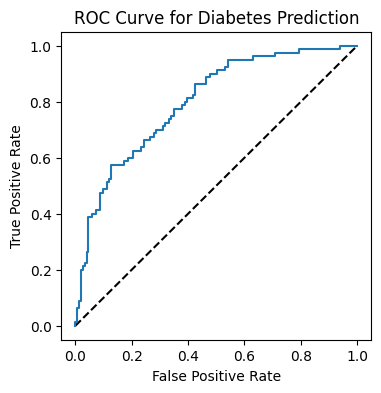

In [39]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

### Exercise - ROC AUC
The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

In [40]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7980960264900663
[[120  31]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.60      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



## Hyperparameter tuning
**Hyperparameter tuning**
- Ridge/lasso regression: Choosing alpha
- KNN: Choosing n_neighbors
- Hyperparameters: Parameters we specify before fitting the model
    - Like alpha and n_neighbors
 
**Choosing the correct hyperparameters**
1. Try lots of different hyperparameter values
2. Fit all of them separately
3. See how well they perform
4. Choose the best-performing values

- This is called **hyperparameter tuning**- 
It is essential to use cross-validation to avoid ove
- We can still split the data and perform cross-validation on the training set- 
We withhold the test set for r

In [20]:
sales_df = pd.read_csv('datasets/advertising_and_sales_clean.csv', index_col=None)
display(sales_df.head())


# Create X from the radio column's values (.values to make sure they are numpy array)
X = sales_df[['radio','social_media']].values

# Create y from the sales column's values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

,Unnamed: 0,tv,radio,social_media,sales
0,0,16000.0,6566.23,2907.98,54732.76
1,1,13000.0,9237.76,2409.57,46677.90
2,2,41000.0,15886.45,2913.41,150177.83
3,3,83000.0,30020.03,6922.30,298246.34
4,4,15000.0,8437.41,1406.00,56594.18


**GridSearchCV** in scikit-learn

In [21]:
# GridSearchCV in scikit-learn
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver": ["sag","lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.7504586107723291


**RandomizedSearchCV** as an alternative approach

In [22]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
"solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.7504583109956762


In [23]:
# Evaluating on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.7608817222332329


### Exercise -  Hyperparameter tuning with GridSearchCV
Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

In [ ]:
X = diabetes_df.drop(["glucose"], axis=1).values
y = diabetes_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [28]:
# Import GridSearchCV and Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1.0}
Tuned lasso score: 0.7504583111062649


Unfortunately, the best model only has an R-squared score of 0.33, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

### Exercise  - Hyperparameter tuning with RandomizedSearchCV

In [29]:
X = diabetes_df.drop(["diabetes"], axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(614, 9) (614,)


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

log_reg = LogisticRegression(solver='liblinear',max_iter=10000)
# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(log_reg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.02050612244897959, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.8346938775510204}
Tuned Logistic Regression Best Accuracy Score: 0.677582300413168


Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set!